In [224]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [225]:
data=pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [226]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [227]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 데이터 딕셔너리
 - survived : 생존 = 1 죽음 = 0
 - pclass : 승객 등급. 1등급, 2등급, 3등급
 - sibsp : 합께 탑승한 형제 또는 배우자 수
 - parch : 함께 탑승한 부모 또는 자녀 수
 - ticket : 티켓 번호
 - cabin : 선실 번호
 - embarked : 탑승 장소 S=Southhampton, C=Cherbourg, Q=Queenstown

- sns.factorplot(x,y,hue) : y평균값 그래프. hue로 지정된 필드의 종류만큼 라인이 그려짐.
- sns.violinplot(x,y,hue) : y값의 범위와 분포를 알 수 있는 그래프.


In [228]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

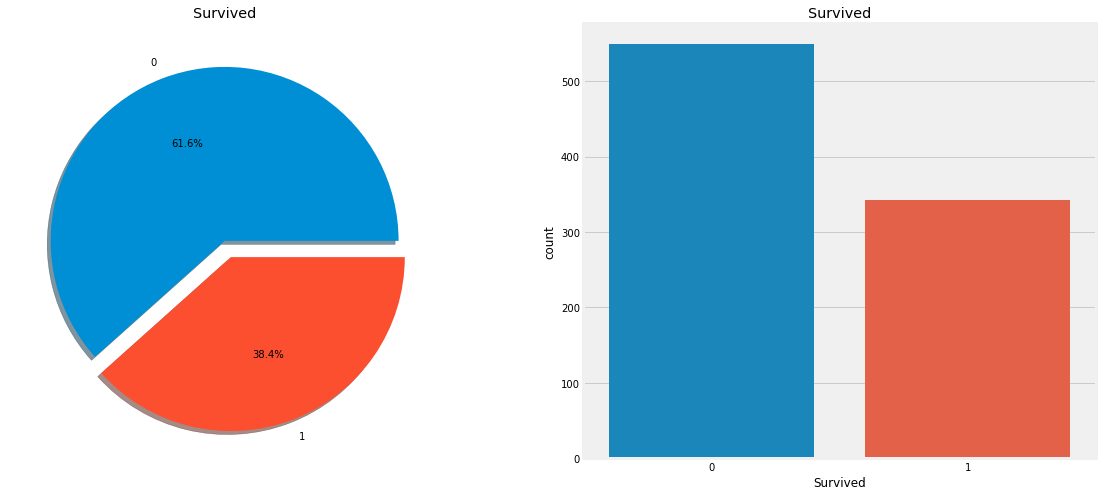

In [229]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

data['Survived'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax= ax[0], shadow =True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [230]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

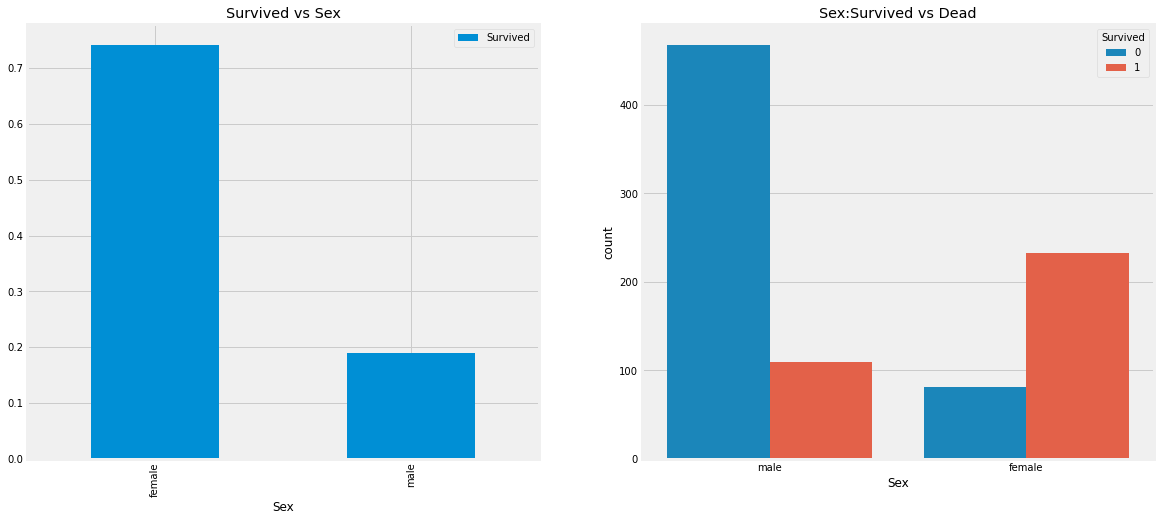

In [231]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue = 'Survived', data = data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [232]:
pd.crosstab(data.Pclass, data.Survived, margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


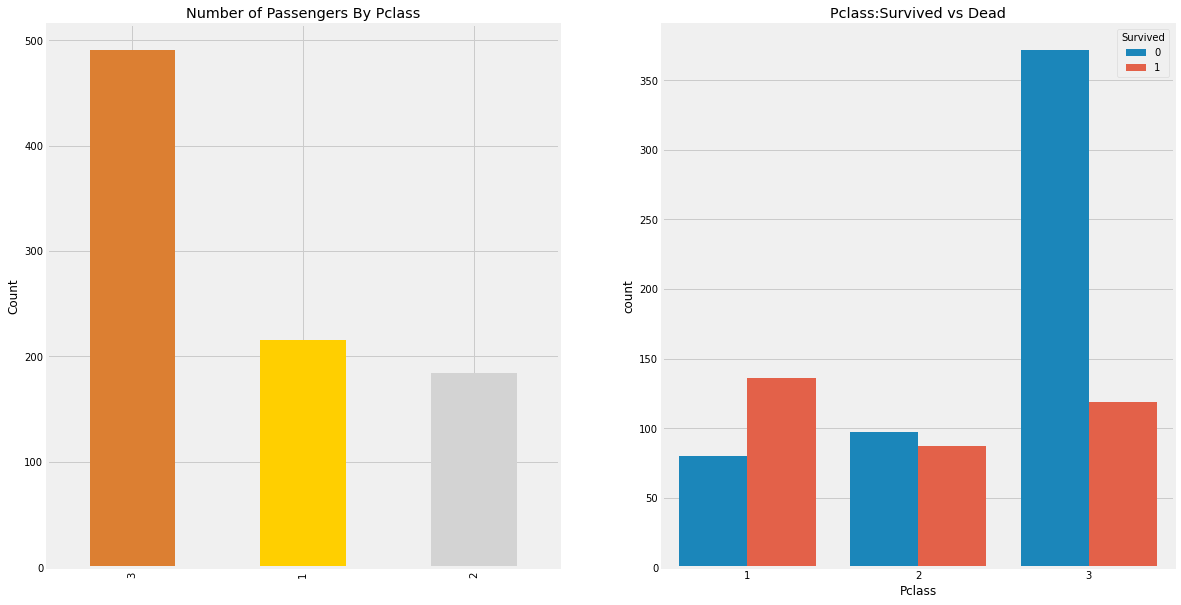

In [233]:
f, ax = plt.subplots(1, 2, figsize = (18,10))
data['Pclass'].value_counts().plot.bar(color = ['#DC7F32', '#FFCF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue = 'Survived', data = data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [234]:
pd.crosstab([data.Sex, data.Survived], data.Pclass,margins = True).style.background_gradient(cmap=('summer_r'))

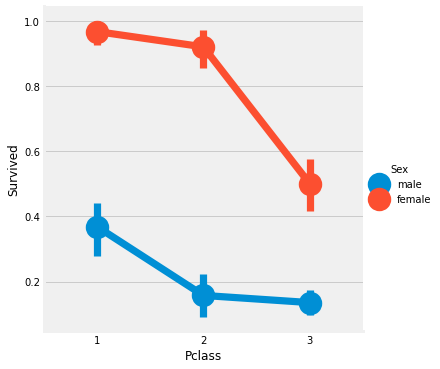

In [235]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data=data, aspect = 1)
plt.show()

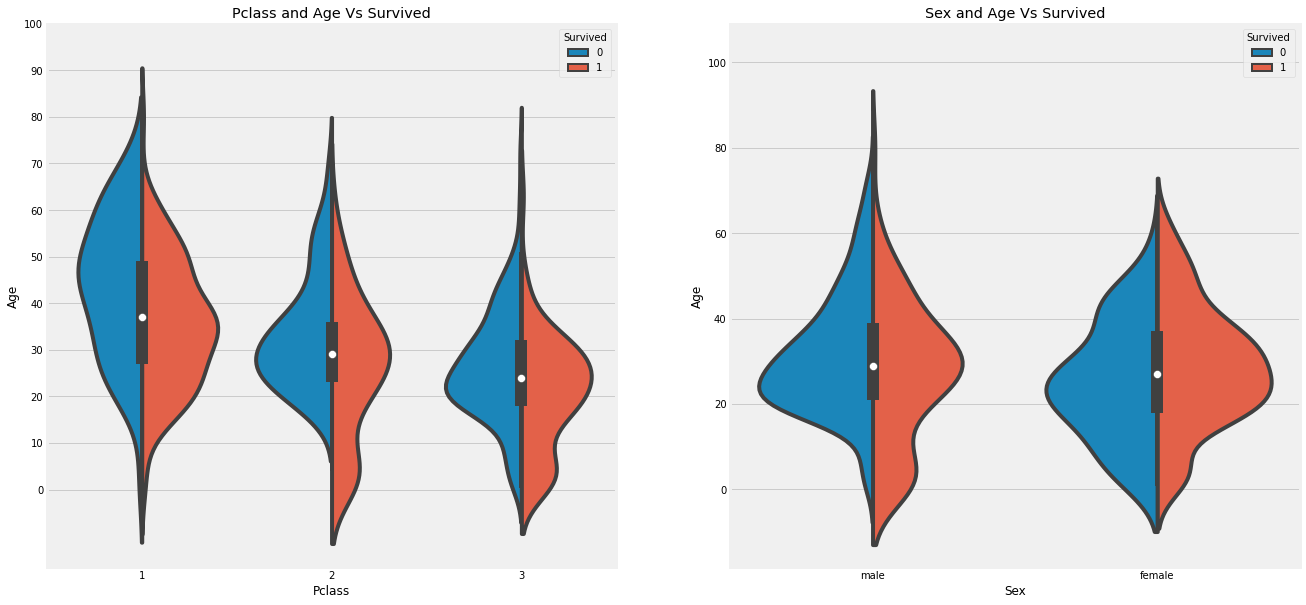

In [236]:
f, ax = plt.subplots(1, 2, figsize = (20, 10))
sns.violinplot('Pclass', 'Age', hue = 'Survived', data = data, split = True, ax =ax[0])
ax[0].set_title('Pclass and Age Vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot('Sex', 'Age', hue = 'Survived', split= True, data= data, ax=ax[1])
ax[1].set_title('Sex and Age Vs Survived')
ax[1].set_yticks(range(0,110), 100)
plt.show()

In [237]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [238]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap = 'summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [239]:
data['Initial'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Sir           1
Lady          1
Capt          1
Jonkheer      1
Countess      1
Ms            1
Mme           1
Don           1
Name: Initial, dtype: int64

In [240]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [241]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [242]:
data.loc[(data.Age.isnull()) & (data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial=='Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial=='Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial=='Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial=='Other'), 'Age'] = 46

In [243]:
data.Age.isnull().sum()

0

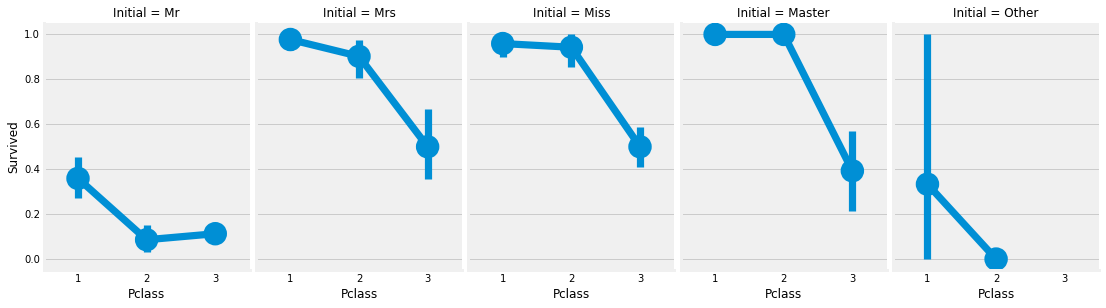

In [244]:
sns.factorplot('Pclass', 'Survived', col = 'Initial', data=data)
fig = plt.gcf()
fig.set_size_inches(15,4)
plt.show()

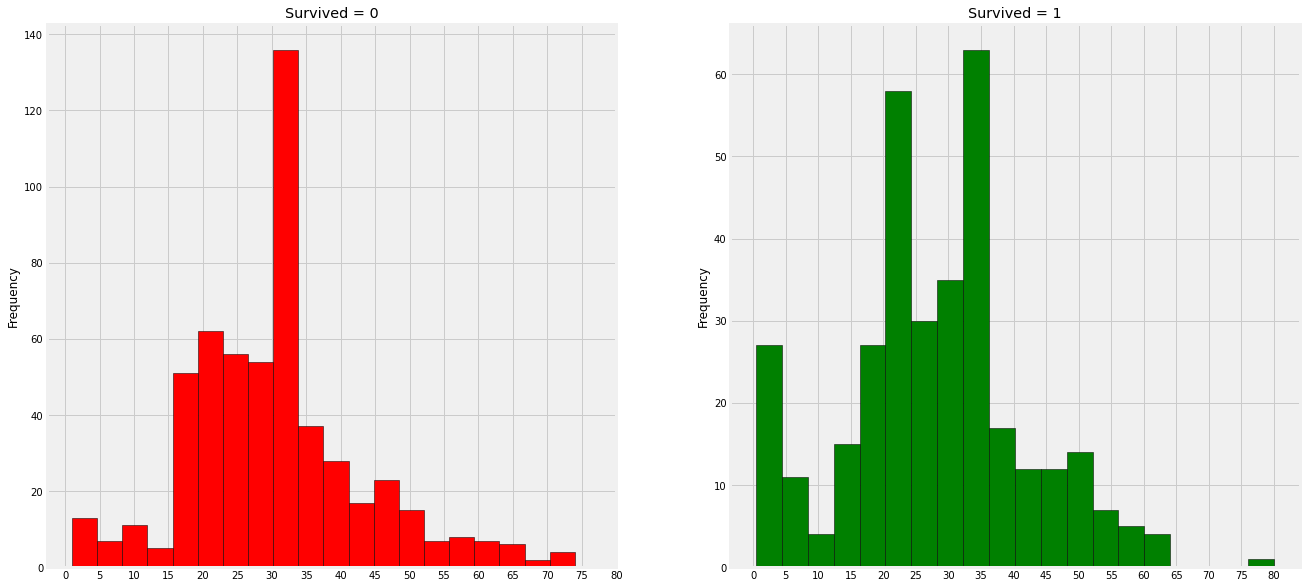

In [245]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
data[data['Survived'] == 0].Age.plot.hist(ax=ax[0], bins=20, edgecolor = 'black', color = 'red')
ax[0].set_title('Survived = 0')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)

data[data['Survived'] == 1].Age.plot.hist(ax=ax[1], bins=20,edgecolor='black', color='green')
ax[1].set_title('Survived = 1')
x2 = list(range(0,85,5))
ax[1].set_xticks(x2)

plt.show()

In [246]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap = 'summer_r')

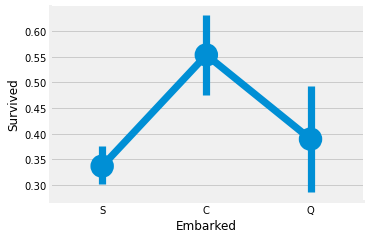

In [247]:
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

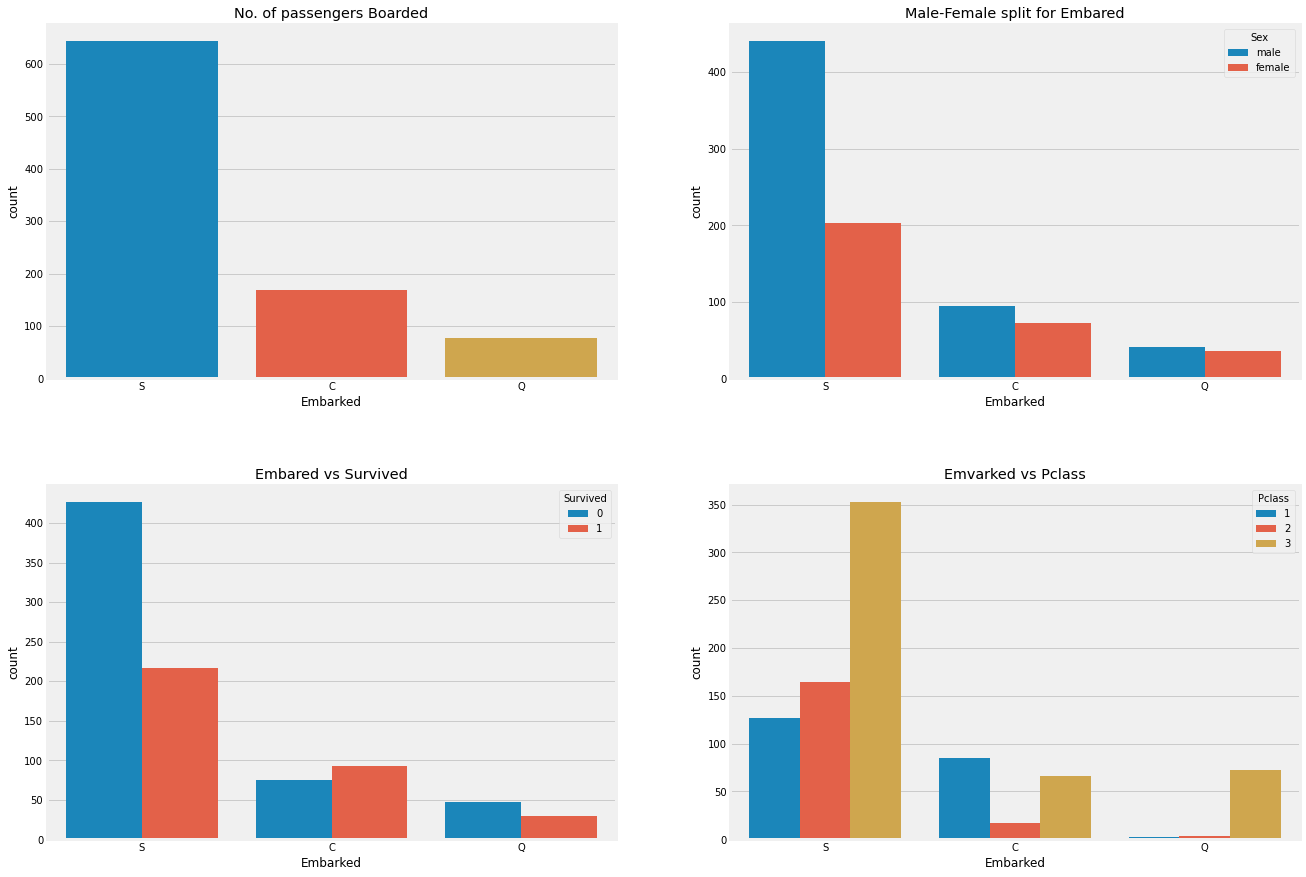

In [248]:
f, ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked', data=data,ax=ax[0,0])
ax[0,0].set_title('No. of passengers Boarded')

sns.countplot('Embarked', hue = 'Sex', data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female split for Embared')

sns.countplot('Embarked', hue = 'Survived', data=data,ax=ax[1,0])
ax[1,0].set_title('Embared vs Survived')

sns.countplot('Embarked', hue = 'Pclass', data=data,ax=ax[1,1])
ax[1,1].set_title('Emvarked vs Pclass')

plt.subplots_adjust(wspace = 0.2, hspace = 0.3)
plt.show()

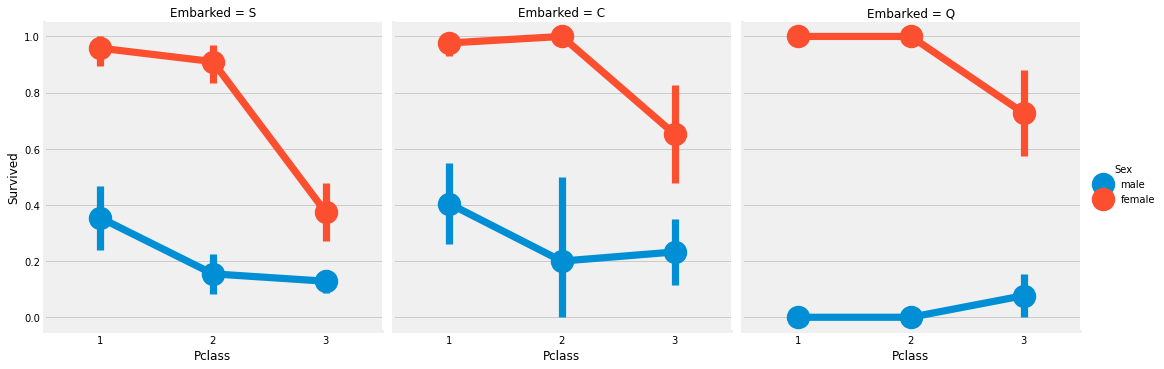

In [249]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', col = 'Embarked', data=data)
plt.show()

# Filling Embared NaN
as we saw that maximum passengers boarded from port S. we replace NaN with S.


In [250]:
data['Embarked'].fillna('S', inplace=True)
data['Embarked'].isnull().sum()

0

# Check SibSip
 - sibling = brother, sister etc
 - spouse = husband, wife

In [251]:
pd.crosstab(data.SibSp, data.Survived).style.background_gradient('summer')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


 - sns.barplot의 막대는 95% 신뢰구간
 - 표준편차를 할려면 ci='sd' 추가

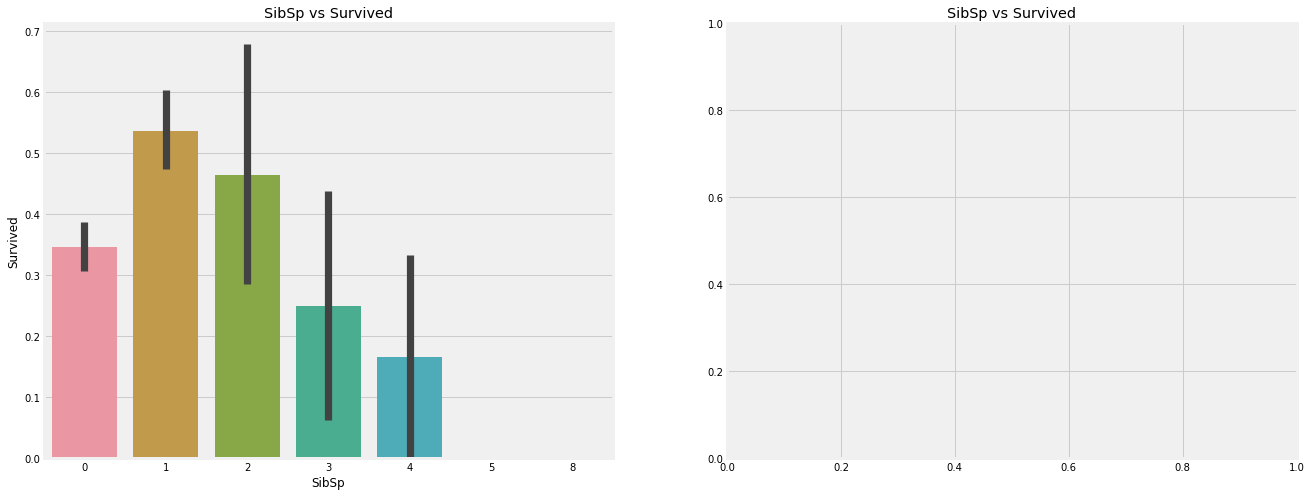

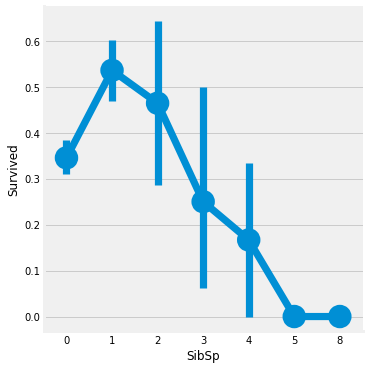

In [253]:
# sns.barplot의 막대는 95% 범위
f, ax = plt.subplots(1, 2, figsize = (20, 8))
sns.barplot('SibSp', 'Survived', data = data, ax=ax[0]) #ci='sd')
ax[0].set_title('SibSp vs Survived')

sns.factorplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(3)
plt.show()

In [254]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient('summer')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


# Check Parch.

In [255]:
pd.crosstab(data.Parch, data.Survived).style.background_gradient('summer')

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


In [256]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient('summer')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


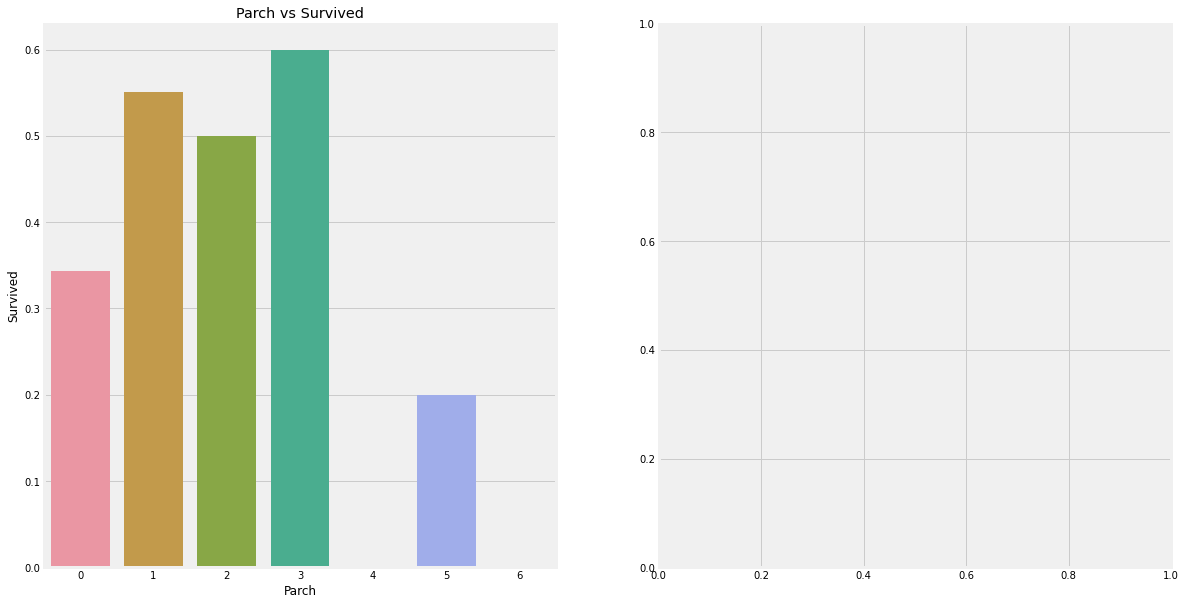

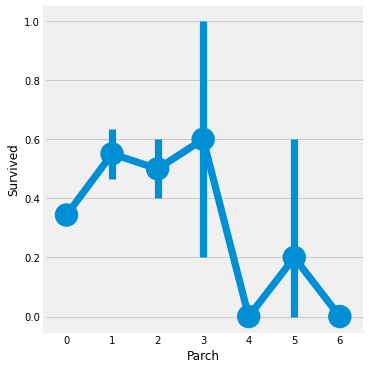

In [257]:
f, ax = plt.subplots(1, 2, figsize=(18,10))
sns.barplot('Parch', 'Survived', data=data, ax=ax[0], ci= None)
ax[0].set_title('Parch vs Survived')

sns.factorplot('Parch', 'Survived', data=data, ax=ax[1], )

plt.show()

# Check Fare feature

In [258]:
print('hightest : ', data.Fare.max())
print('lowest : ', data.Fare.min())
print(data['Fare'].mean())

hightest :  512.3292
lowest :  0.0
32.2042079685746


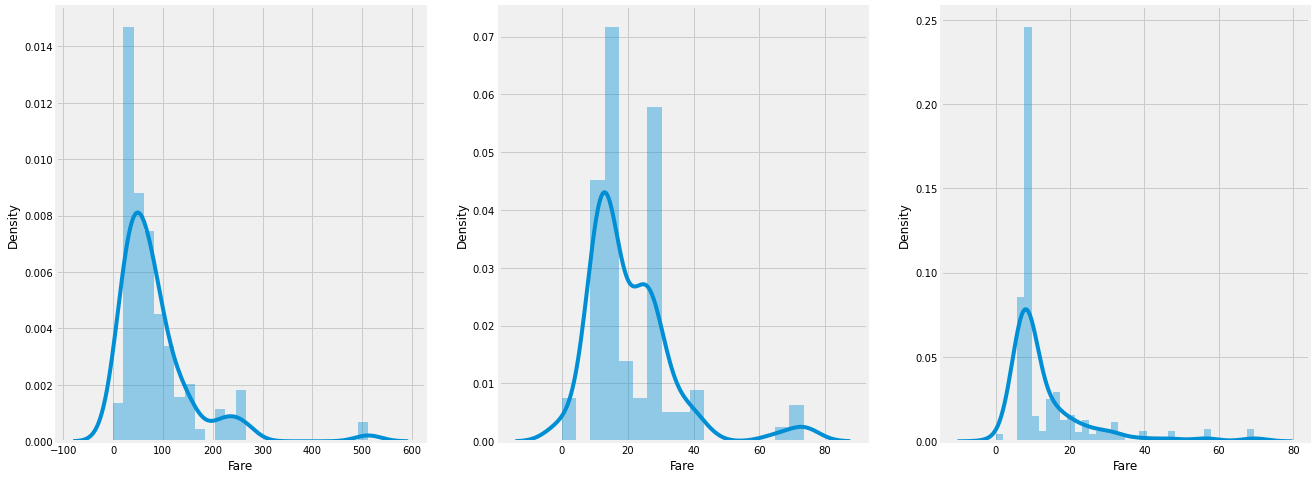

In [259]:
f, ax = plt.subplots(1,3,figsize = (20,8))
sns.distplot(data[data['Pclass'] == 1].Fare, ax=ax[0])
sns.distplot(data[data['Pclass'] == 2].Fare, ax=ax[1])
sns.distplot(data[data['Pclass'] == 3].Fare, ax=ax[2])
plt.show()

## Correltation Between The Features

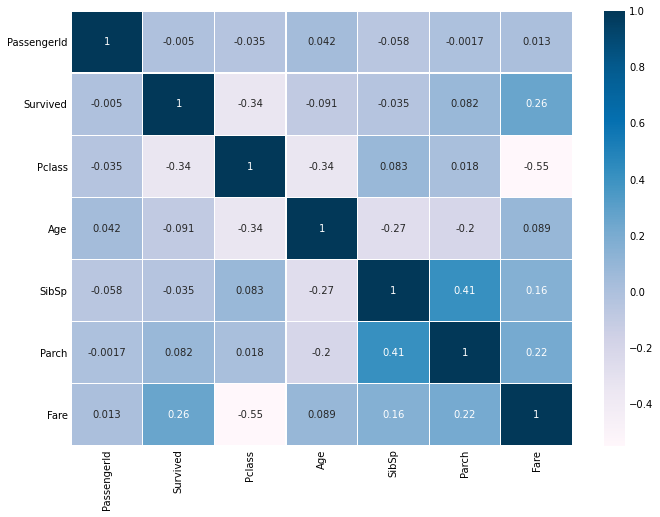

In [218]:
sns.heatmap(data.corr(), annot=True, cmap='PuBu', linewidths = 0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

# Converting String Values into Numeric

In [260]:
data['Sex'].replace(['male', 'female'], [0,1], inplace = True)
data['Embarked'].replace(['S', 'C', 'Q'], [0,1,2], inplace = True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master','Other'], [0,1,2,3,4], inplace = True)

# Dropping UnNeeded Features

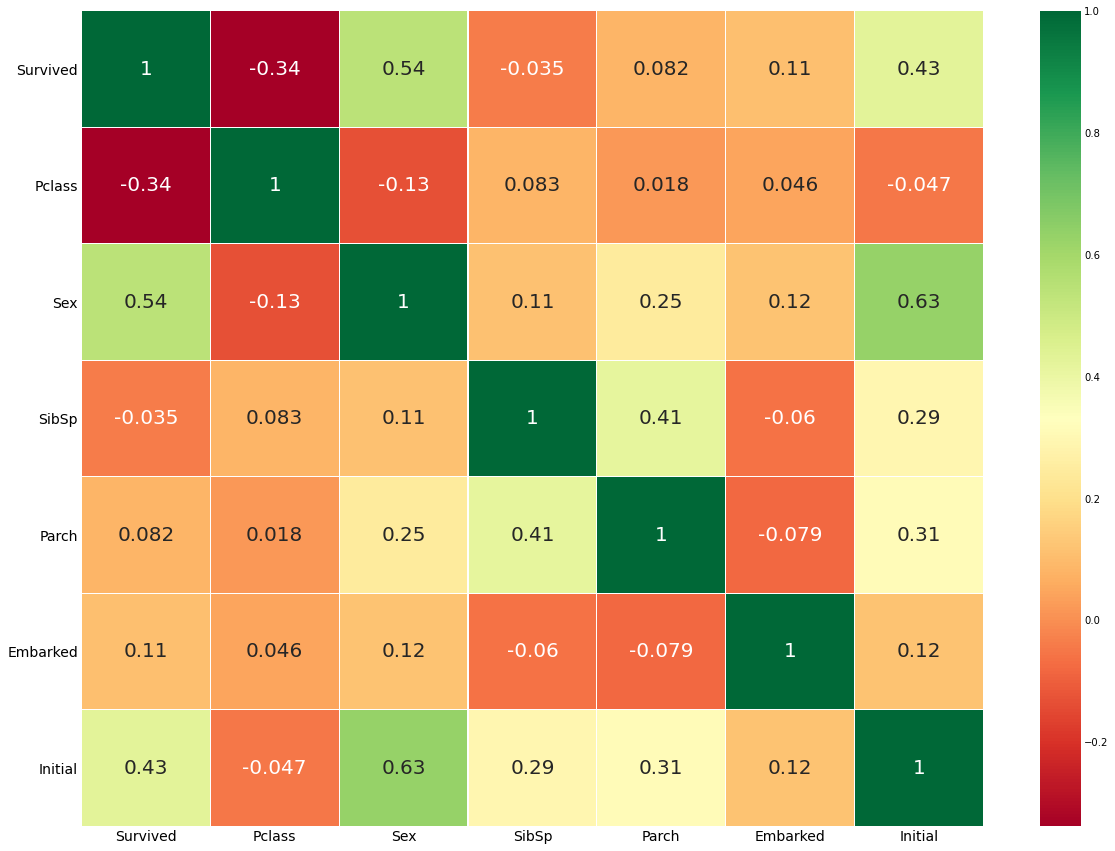

In [264]:
#data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin','PassengerId'],axis = 1, inplace=True)
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws = {'size':20})
fig = plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

# Predictive Modeling

In [268]:
# importing all the requred ML packages
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

 - stratify : default = None. classification을 다룰 때 매우 중요한 옵션. stratify값을 target으로 지정해주면 각각의 class 비율을 train/validation에 유지해줌. 한쪽에 쏠려서 분배되는 것을 방지.
 - random_state : 세트를 섞을 때 해당 int 값을 보고 섞으며, 하이퍼 파라미터를 튜닝 시 이 값을 고정해두고 튜닝해야 매번 데이터셋이 변경되는 것을 방지

In [269]:
train, test = train_test_split(data, test_size = 0.3, random_state = 0, stratify = data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

# Radial Support Vector Machines(rbf-SVM)

In [271]:
model = svm.SVC(kernel = 'rbf', C=1, gamma = 0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is 0.8395522388059702


#  Linear Support Vector Machine(linear-SVM)

In [273]:
model = svm.SVC(kernel = 'linear', C=1, gamma = 0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is 0.7910447761194029


# Logistic Regression

In [275]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('Accuracy for Logistic Regreesion is', metrics.accuracy_score(prediction3, test_Y))

Accuracy for Logistic Regreesion is 0.8097014925373134


# Decision Tree

In [276]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('Accuracy for Decision Tree is', metrics.accuracy_score(prediction4, test_Y))

Accuracy for Decision Tree is 0.8208955223880597


# K-Nearest Neighbours(KNN)

In [277]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('Accuracy for KNN is', metrics.accuracy_score(prediction5, test_Y))

Accuracy for KNN is 0.8208955223880597


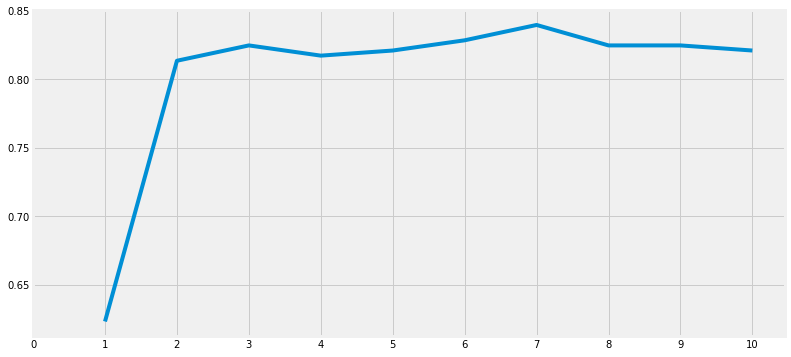

Accuracies for different values of n are: [0.62313433 0.81343284 0.82462687 0.81716418 0.82089552 0.82835821
 0.83955224 0.82462687 0.82462687 0.82089552] with the max value as  0.8395522388059702


In [279]:
a_index = list(range(1,11))
a = pd.Series()
x = [0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(train_X,train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:', a.values, 'with the max value as ', a.values.max())
    

# Gaussian Naive Bayes

In [280]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the NaiveBayes is ', metrics.accuracy_score(prediction6, test_Y))

The accuracy of the NaiveBayes is  0.8134328358208955


# Cross Validation

In [282]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
kfold = KFold(n_splits=10, random_state = 22, shuffle = True)
xyz = []
accuracy = []
std = []
classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bates', 'Random Forest'] 
models = [svm.SVC(kernel = 'linear'), svm.SVC(kernel='rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors = 9), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=  100)]

for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv = kfold, scoring = 'accuracy')
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame({'CV Mean':xyz, 'Std':std}, index=classifiers)
new_models_dataframe2



,CV Mean,Std
Linear Svm,0.786854,0.057213
Radial Svm,0.828377,0.055299
Logistic Regression,0.796941,0.048606
KNN,0.807054,0.050416
Decision Tree,0.818240,0.043139
Naive Bates,0.812659,0.055985
Random Forest,0.812634,0.047877


<AxesSubplot:>

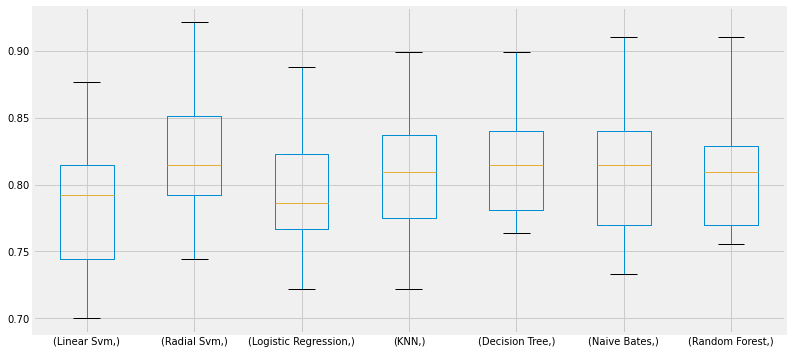

In [283]:
plt.subplots(figsize = (12, 6))
box = pd.DataFrame(accuracy, index = [classifiers])
box.T.boxplot()

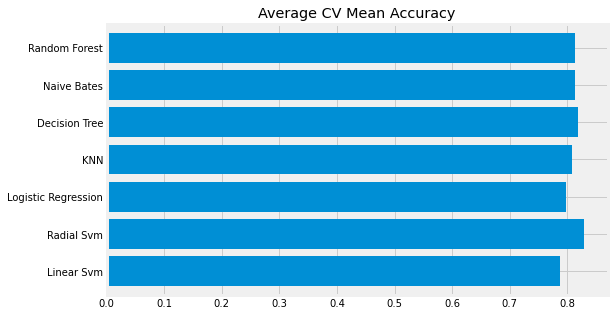

In [285]:
new_models_dataframe2['CV Mean'].plot.barh(width = 0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

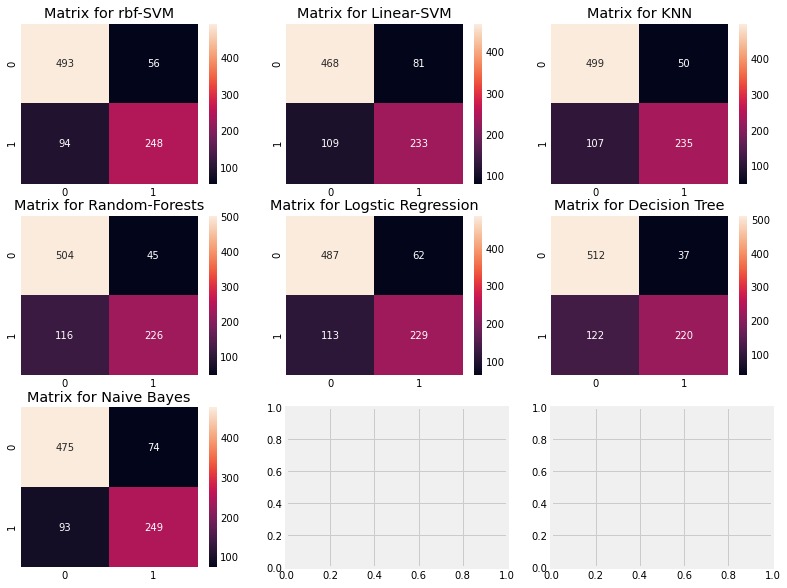

In [288]:
f, ax = plt.subplots(3,3,figsize = (12,10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv= 10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,0], annot=True, fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax = ax[0, 1], annot=True, fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors = 9), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,2], annot= True, fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators = 100), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,0], annot =True, fmt = '2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,1], annot=True, fmt='2.0f')
ax[1,1].set_title('Matrix for Logstic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(),X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,2], annot = True, fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax= ax[2,0], annot=True, fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace = 0.2, wspace = 0.2)
plt.show()

In [291]:
from sklearn.model_selection import GridSearchCV
C= [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, .6, 0.7, 0.8, 0.9, 1.0]
kernel = ['rbf', 'linear']
hyper = {'kernel':kernel, 'C' : C, 'gamma':gamma}
gd = GridSearchCV(estimator =svm.SVC(), param_grid = hyper, verbose = True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8316238779737619
SVC(C=1, gamma=0.2)


In [292]:
n_estimators = range(100, 1000, 100)
hyper = {'n_estimators' : n_estimators}
gd = GridSearchCV(estimator = RandomForestClassifier(random_state = 0), param_grid = hyper, verbose = True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.8159625886636117
RandomForestClassifier(n_estimators=300, random_state=0)


In [299]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators = [('KNN', KNeighborsClassifier(n_neighbors = 10)), 
                                                 ('RBF', svm.SVC(probability = True, kernel = 'rbf', C=0.5, gamma = 0.1)),
                                                 ('RFor', RandomForestClassifier(n_estimators = 500, random_state = 0)), 
                                                 ('LR', LogisticRegression(C=0.05)), 
                                                 ('DT', DecisionTreeClassifier(random_state = 0)),
                                                 ('NB', GaussianNB()),
                                                 ('svm', svm.SVC(kernel='linear', probability = True))],
                                                 voting = 'soft').fit(train_X, train_Y)
print('The accuracy for ensembled model is:', ensemble_lin_rbf.score(test_X, test_Y))
cross = cross_val_score(ensemble_lin_rbf, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score is', cross.mean())

The accuracy for ensembled model is: 0.832089552238806
The cross validated score is 0.8316354556803995


In [301]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator = KNeighborsClassifier(n_neighbors = 3), random_state = 0, n_estimators = 700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is:', metrics.accuracy_score(prediction, test_Y))
result=cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged KNN is:', result.mean())

The accuracy for bagged KNN is: 0.8208955223880597
The cross validated score for bagged KNN is: 0.826067415730337


In [303]:
model =BaggingClassifier(base_estimator = DecisionTreeClassifier(), random_state = 0, n_estimators=100)
model.fit(train_X, train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:', metrics.accuracy_score(prediction, test_Y))
result=cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:', result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8159675405742822


In [304]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result=cross_val_score(ada, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for AdaBoost is:', result.mean())

The cross validated score for AdaBoost is: 0.8294007490636706


In [305]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for Gradient Boosting is:', result.mean())

The cross validated score for Gradient Boosting is: 0.8193757802746566


In [308]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate = 0.1)
result = cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for XHBoost is:', result.mean())

The cross validated score for XHBoost is: 0.8205118601747815


In [309]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.05, n_estimators=300)


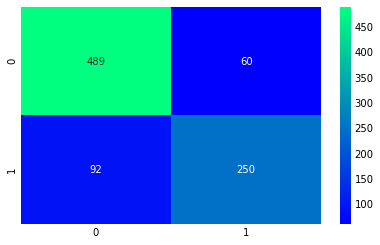

In [310]:
ada = AdaBoostClassifier(n_estimators= 200, random_state = 0, learning_rate =0.05)
result = cross_val_predict(ada, X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, result), cmap='winter', annot=True, fmt='2.0f')
plt.show()

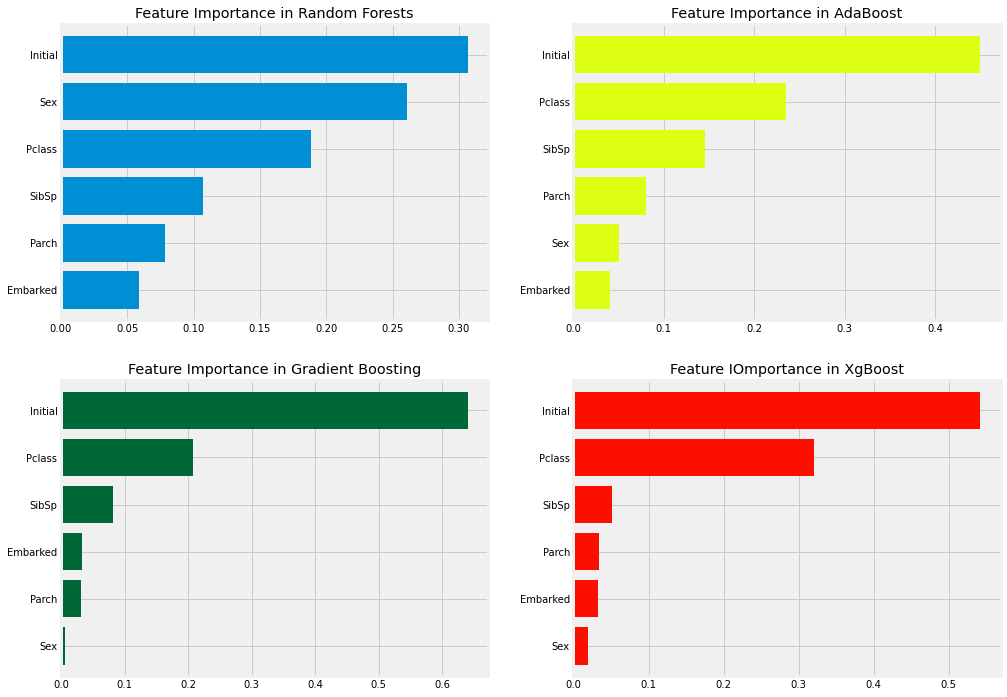

In [318]:
f, ax = plt.subplots(2,2,figsize = (15,12))
model = RandomForestClassifier(n_estimators = 500, random_state = 0)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width = 0.8, ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model = AdaBoostClassifier(n_estimators= 200, learning_rate=0.05, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
#pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0.1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model = GradientBoostingClassifier(n_estimators=500, learning_rate = 0.1, random_state = 0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending= True).plot.barh(width=0.8, ax=ax[1,0], cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model = xg.XGBClassifier(n_estimators=900, learning_rate = 0.1)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width = 0.8, ax=ax[1,1], color='#FD0F00')
ax[1,1].set_title('Feature IOmportance in XgBoost')

plt.show()